# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [3]:
# Load the data
df = pd.read_csv('Datasets/data_NO2.csv', sep=';', parse_dates=['datetime_utc'])

# Basic information about the dataset

In [4]:

# Display basic information about the dataset
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23666 entries, 0 to 23665
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   datetime_utc       23666 non-null  datetime64[ns, UTC]
 1   volume_demand      23666 non-null  float64            
 2   volume_production  23666 non-null  float64            
 3   spot_price         23666 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 739.7 KB
None

First few rows:
               datetime_utc  volume_demand  volume_production  spot_price
0 2015-12-31 23:00:00+00:00         4043.0             7818.0       16.39
1 2016-01-01 00:00:00+00:00         4010.0             7694.0       16.04
2 2016-01-01 01:00:00+00:00         3930.0             7437.0       15.74
3 2016-01-01 02:00:00+00:00         3839.0             7120.0       15.57
4 2016-01-01 03:00:00+00:00         3833.0             7041.0       15.47


# Spot price over time

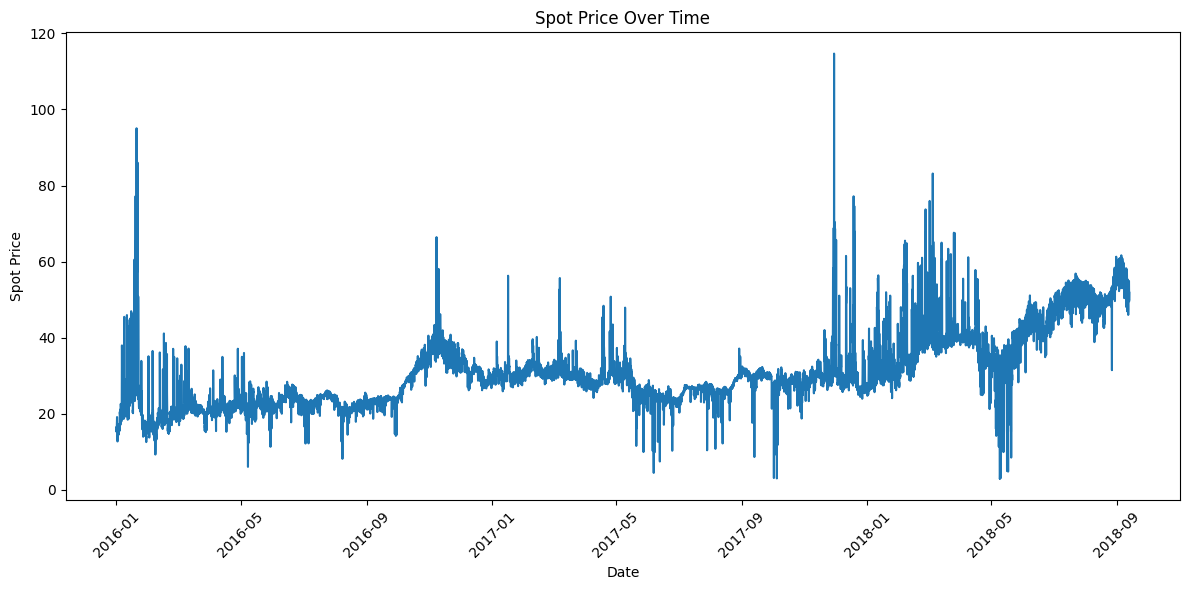

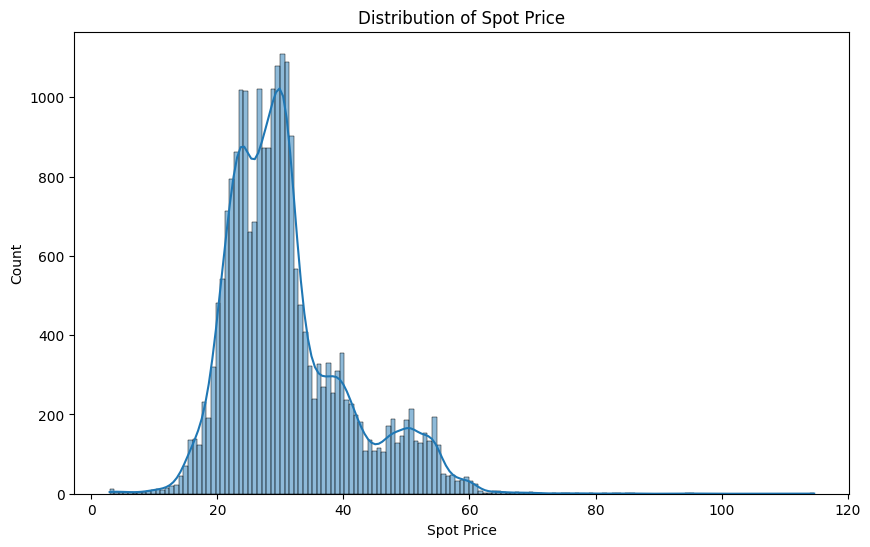

In [5]:
# Time series plot of spot price
plt.figure(figsize=(12, 6))
plt.plot(df['datetime_utc'], df['spot_price'])
plt.title('Spot Price Over Time')
plt.xlabel('Date')
plt.ylabel('Spot Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of spot price
plt.figure(figsize=(10, 6))
sns.histplot(df['spot_price'], kde=True)
plt.title('Distribution of Spot Price')
plt.xlabel('Spot Price')
plt.show()

# Correlation 

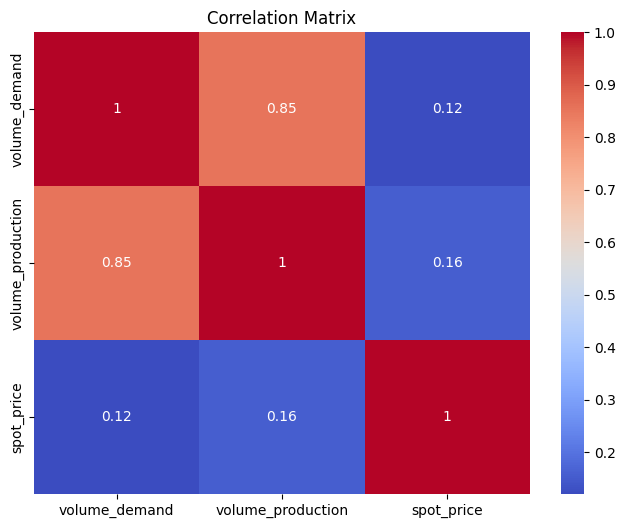

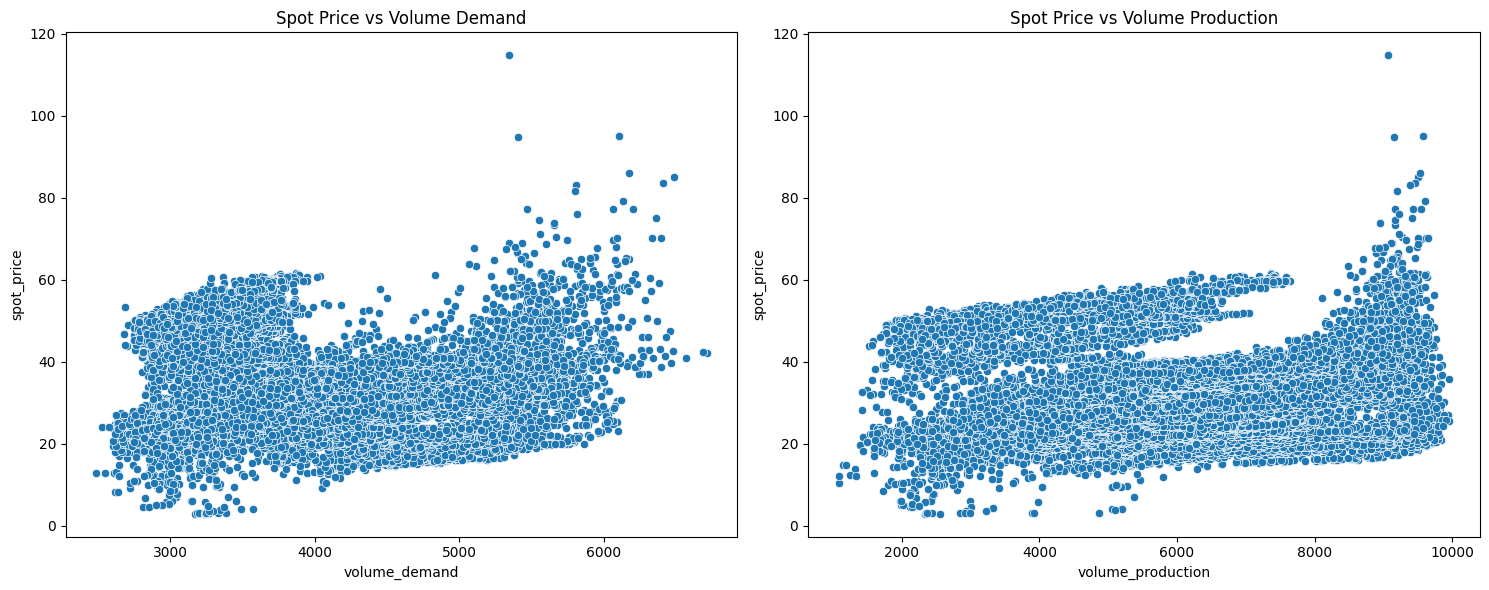

In [6]:
# Correlation matrix
correlation_matrix = df[['volume_demand', 'volume_production', 'spot_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(data=df, x='volume_demand', y='spot_price', ax=axes[0])
axes[0].set_title('Spot Price vs Volume Demand')
sns.scatterplot(data=df, x='volume_production', y='spot_price', ax=axes[1])
axes[1].set_title('Spot Price vs Volume Production')
plt.tight_layout()
plt.show()


# Monthly price analysis

<Figure size 1200x600 with 0 Axes>

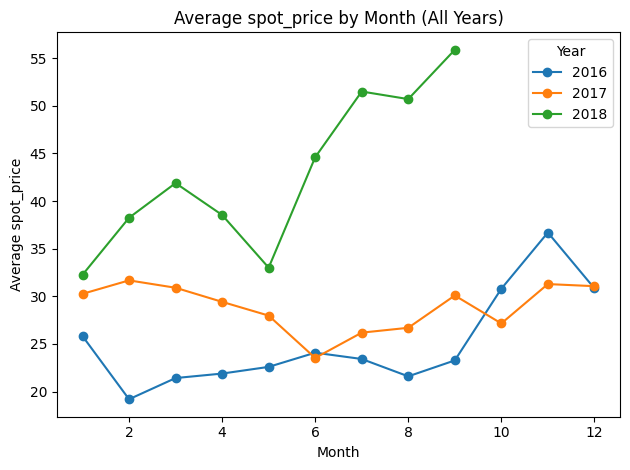

<Figure size 1200x600 with 0 Axes>

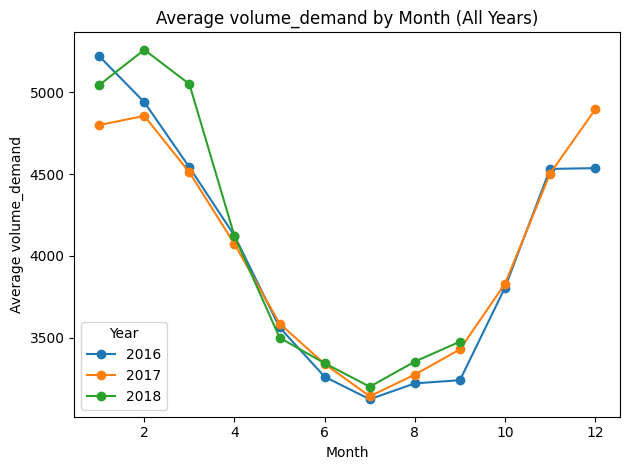

<Figure size 1200x600 with 0 Axes>

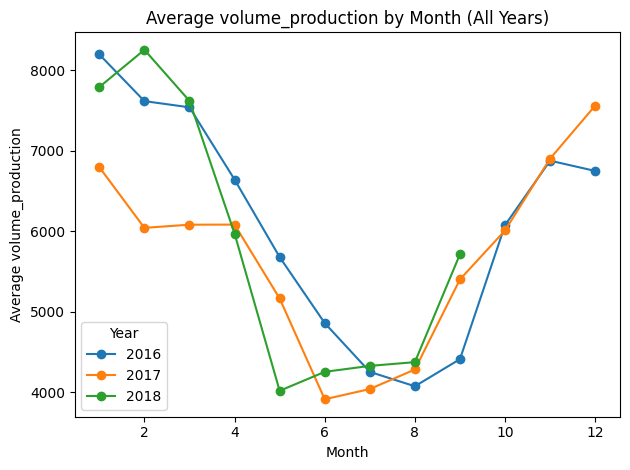

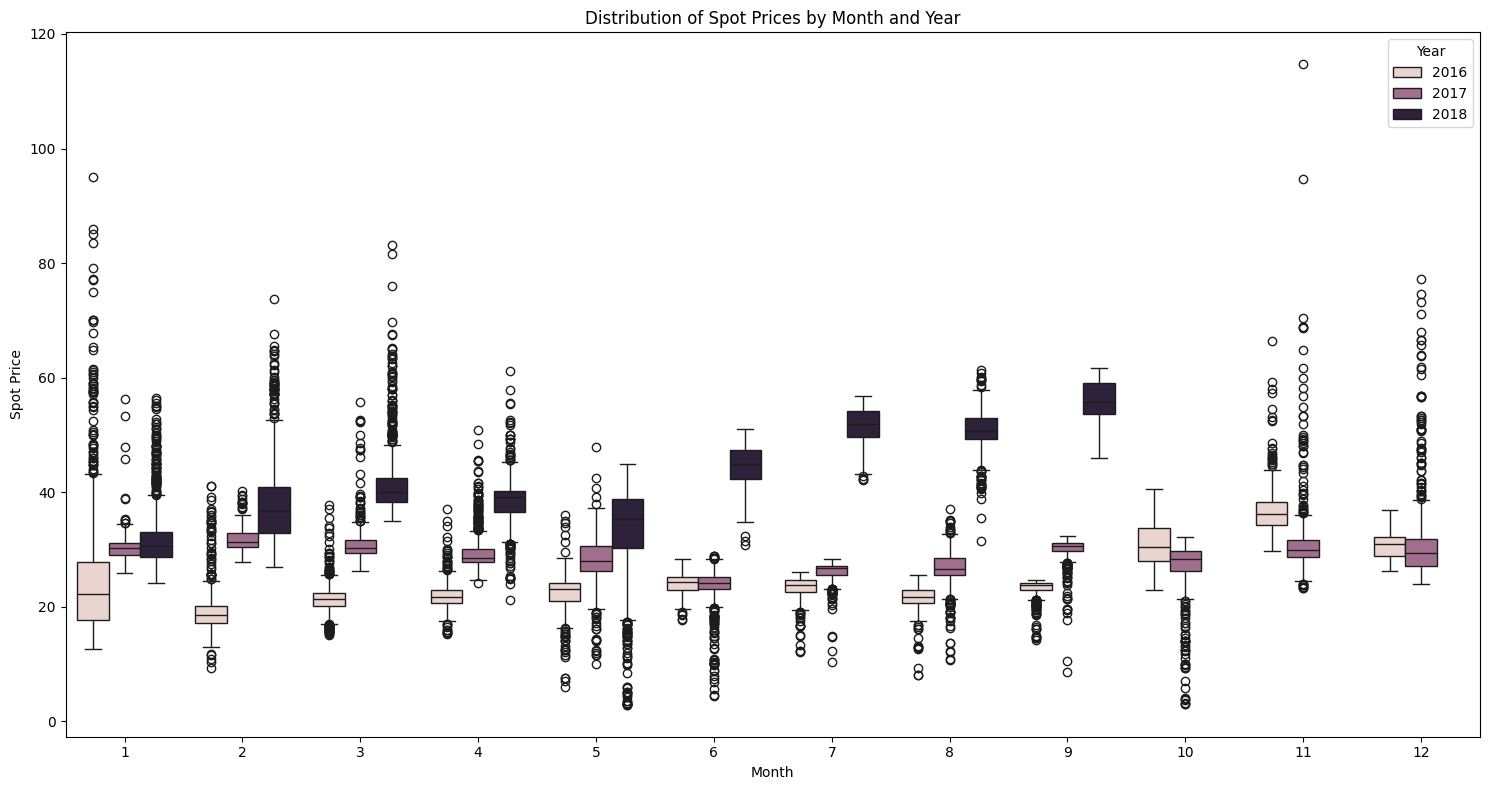

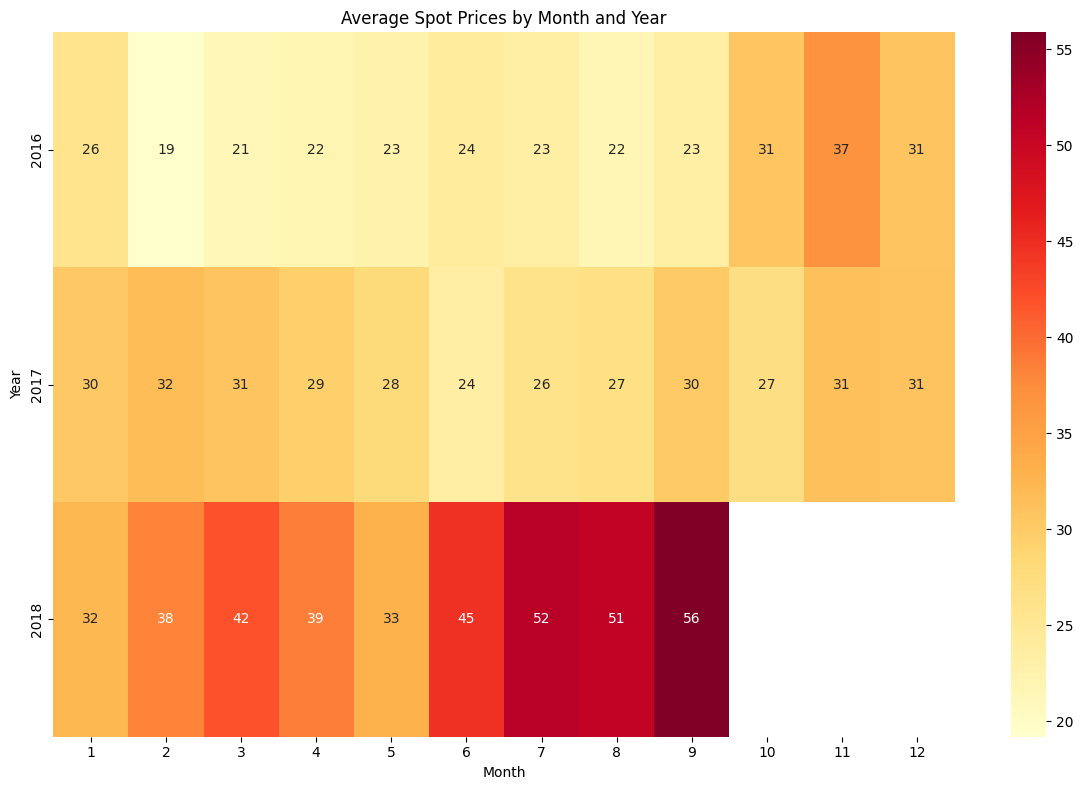

In [7]:


# Extract year and month, and drop 2015
df['year'] = df['datetime_utc'].dt.year
df['month'] = df['datetime_utc'].dt.month
df = df[df['year'] != 2015]

# Function to plot monthly averages for all years
def plot_monthly_averages(data, variable):
    monthly_avg = data.groupby(['year', 'month'])[variable].mean().unstack(level=0)
    
    plt.figure(figsize=(12, 6))
    monthly_avg.plot(marker='o')
    plt.title(f'Average {variable} by Month (All Years)')
    plt.xlabel('Month')
    plt.ylabel(f'Average {variable}')
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()

# Plot monthly averages for spot_price, volume_demand, and volume_production
variables = ['spot_price', 'volume_demand', 'volume_production']
for variable in variables:
    plot_monthly_averages(df, variable)

# Box plot of spot prices by month for each year
plt.figure(figsize=(15, 8))
sns.boxplot(x='month', y='spot_price', hue='year', data=df)
plt.title('Distribution of Spot Prices by Month and Year')
plt.xlabel('Month')
plt.ylabel('Spot Price')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# Heatmap of average spot prices by month and year
monthly_avg = df.groupby(['year', 'month'])['spot_price'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_avg, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Spot Prices by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


# Weekly price analysis

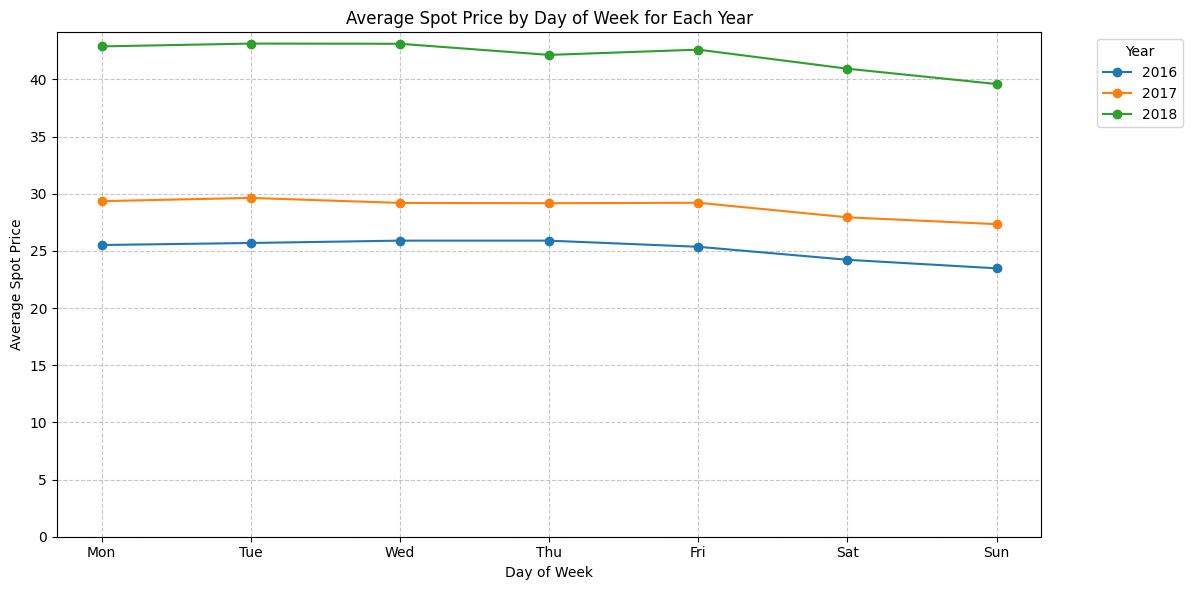

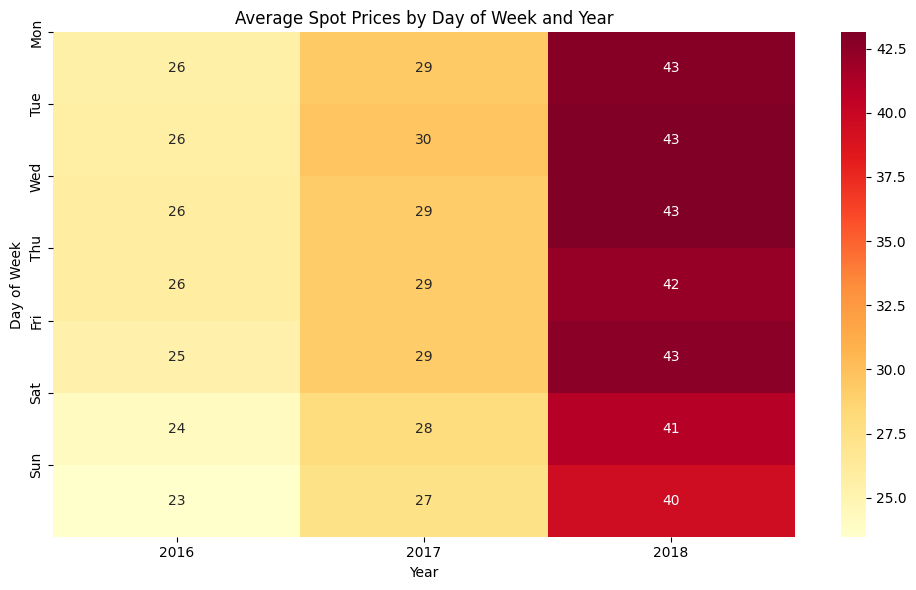

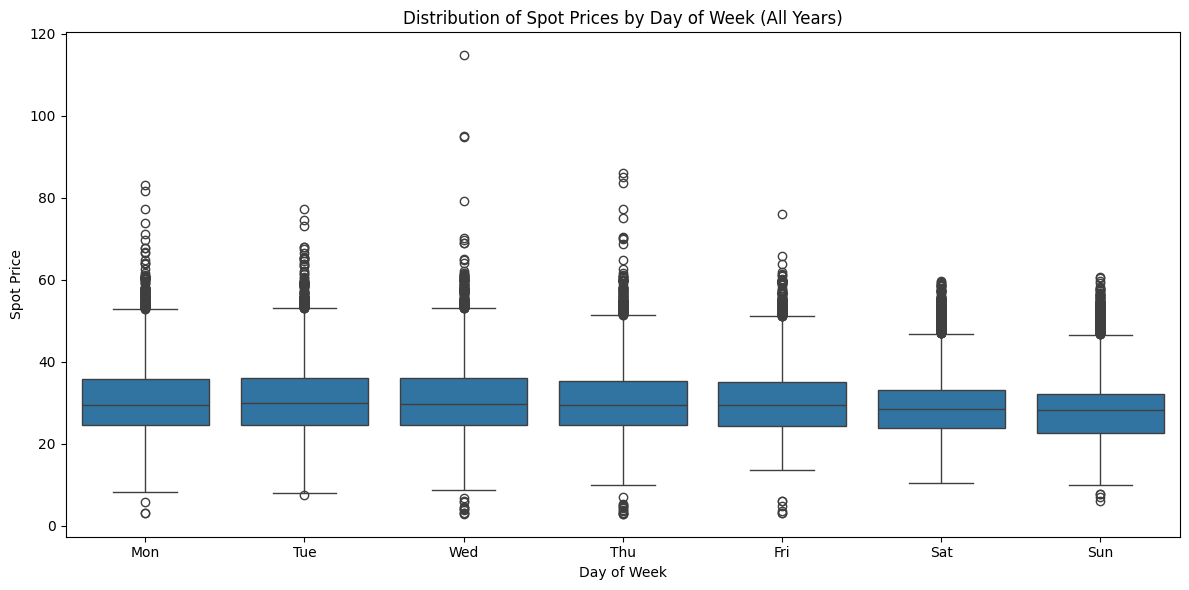

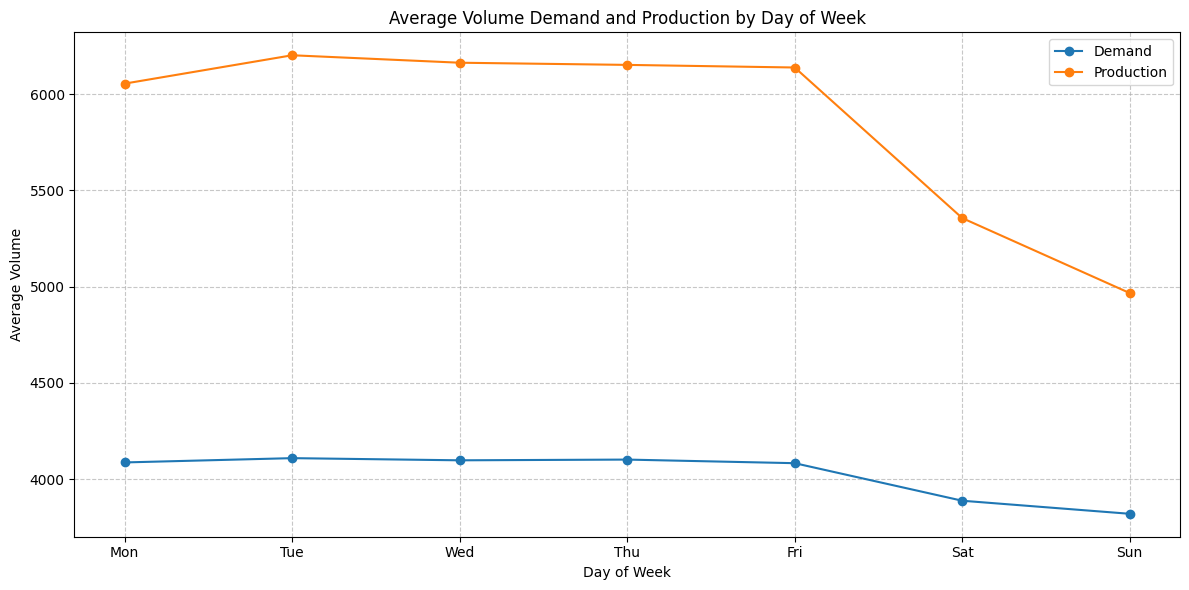

In [10]:
# Daily price analysis within weeks

# Extract day of week from datetime (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['datetime_utc'].dt.dayofweek

# Calculate average spot price by day of week for each year
daily_avg = df.groupby(['year', 'day_of_week'])['spot_price'].mean().unstack()

# Plot average spot price by day of week for each year
plt.figure(figsize=(12, 6))
for year in daily_avg.index:
    plt.plot(daily_avg.columns, daily_avg.loc[year], label=str(year), marker='o')

plt.title('Average Spot Price by Day of Week for Each Year')
plt.xlabel('Day of Week')
plt.ylabel('Average Spot Price')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylim(bottom=0)  # Ensure y-axis starts at 0
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Heatmap of average spot prices by day of week and year
plt.figure(figsize=(10, 6))
sns.heatmap(daily_avg.T, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Spot Prices by Day of Week and Year')
plt.xlabel('Year')
plt.ylabel('Day of Week')
plt.yticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

# Box plot of spot prices by day of week (all years combined)
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='spot_price', data=df)
plt.title('Distribution of Spot Prices by Day of Week (All Years)')
plt.xlabel('Day of Week')
plt.ylabel('Spot Price')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

# Calculate and plot average volume demand and production by day of week
daily_demand = df.groupby('day_of_week')['volume_demand'].mean()
daily_production = df.groupby('day_of_week')['volume_production'].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_demand.index, daily_demand, label='Demand', marker='o')
plt.plot(daily_production.index, daily_production, label='Production', marker='o')
plt.title('Average Volume Demand and Production by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Volume')
plt.legend()
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Intraday price analysis

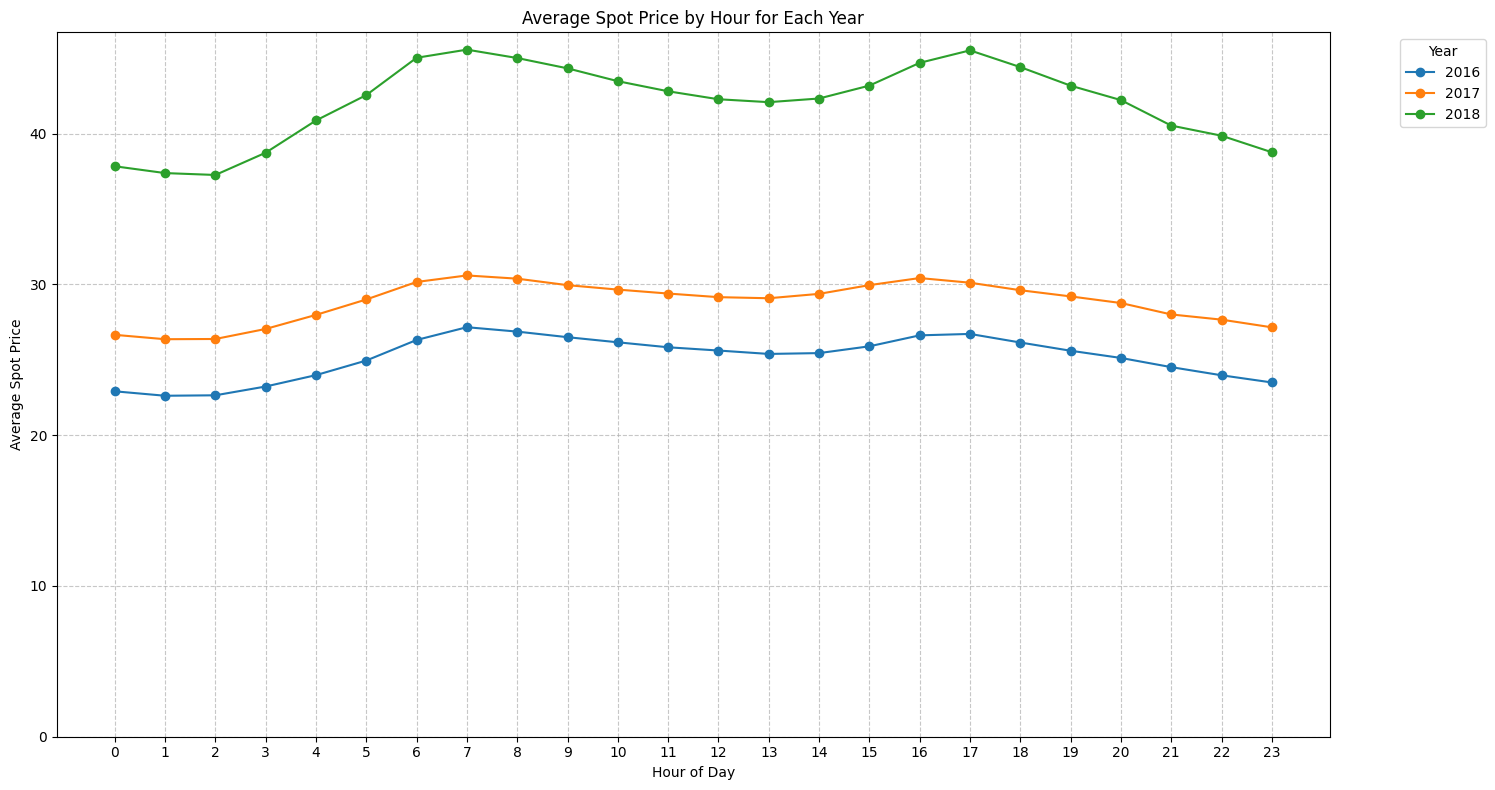

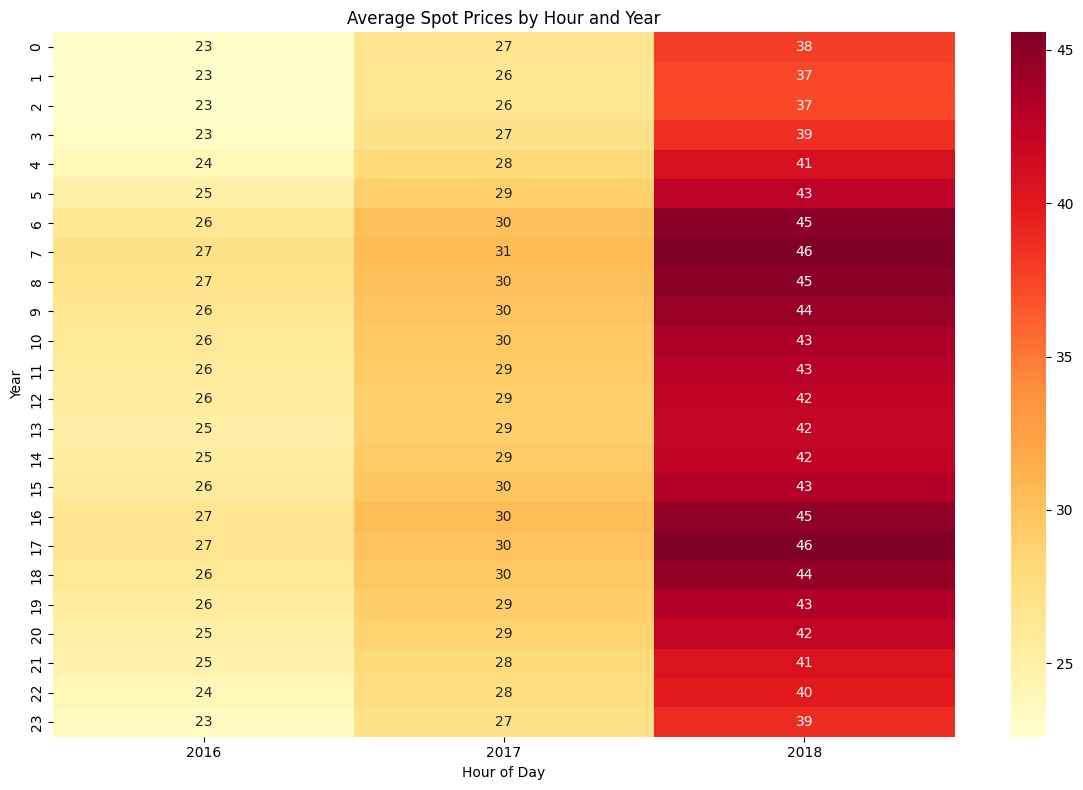

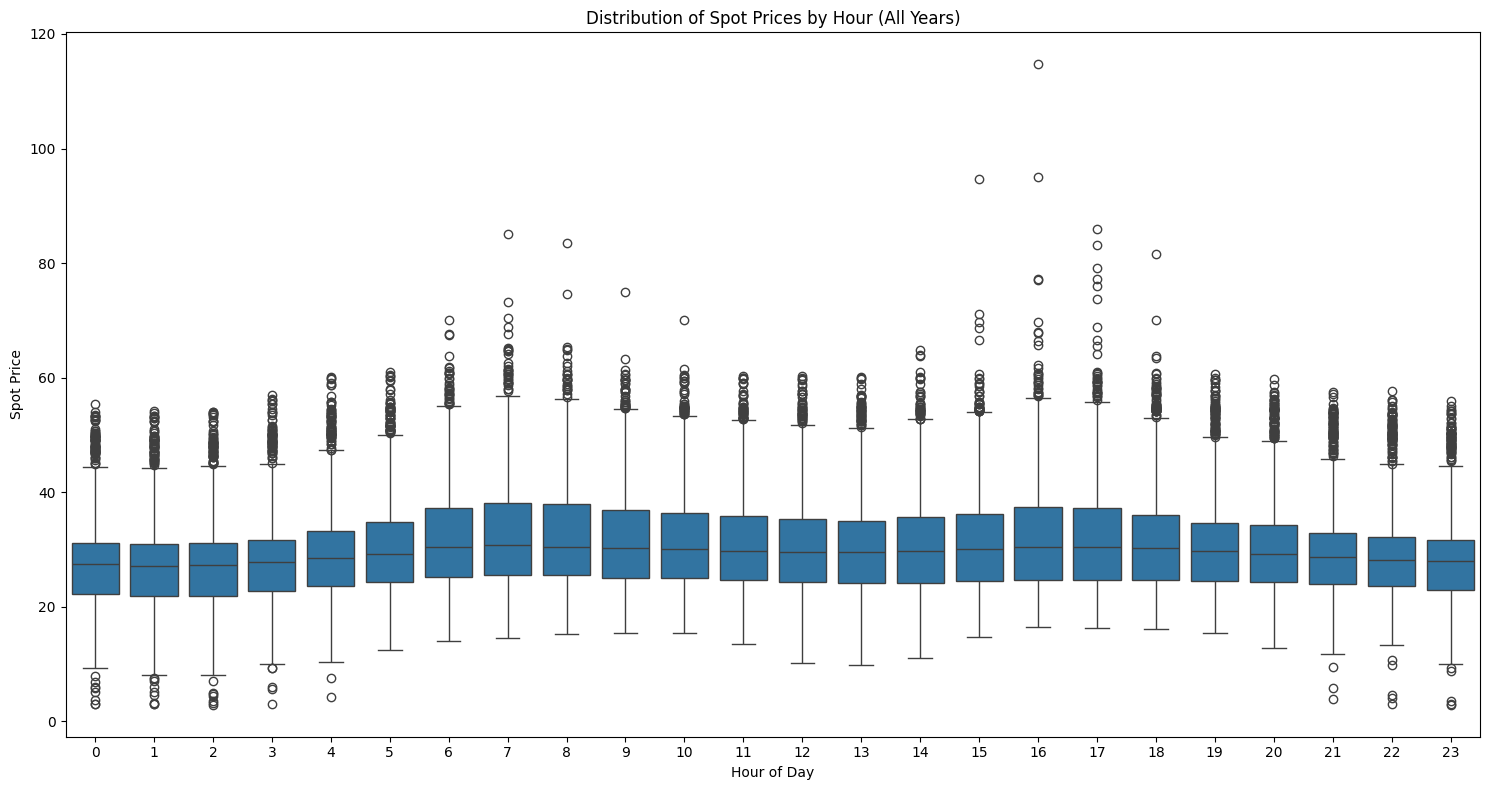

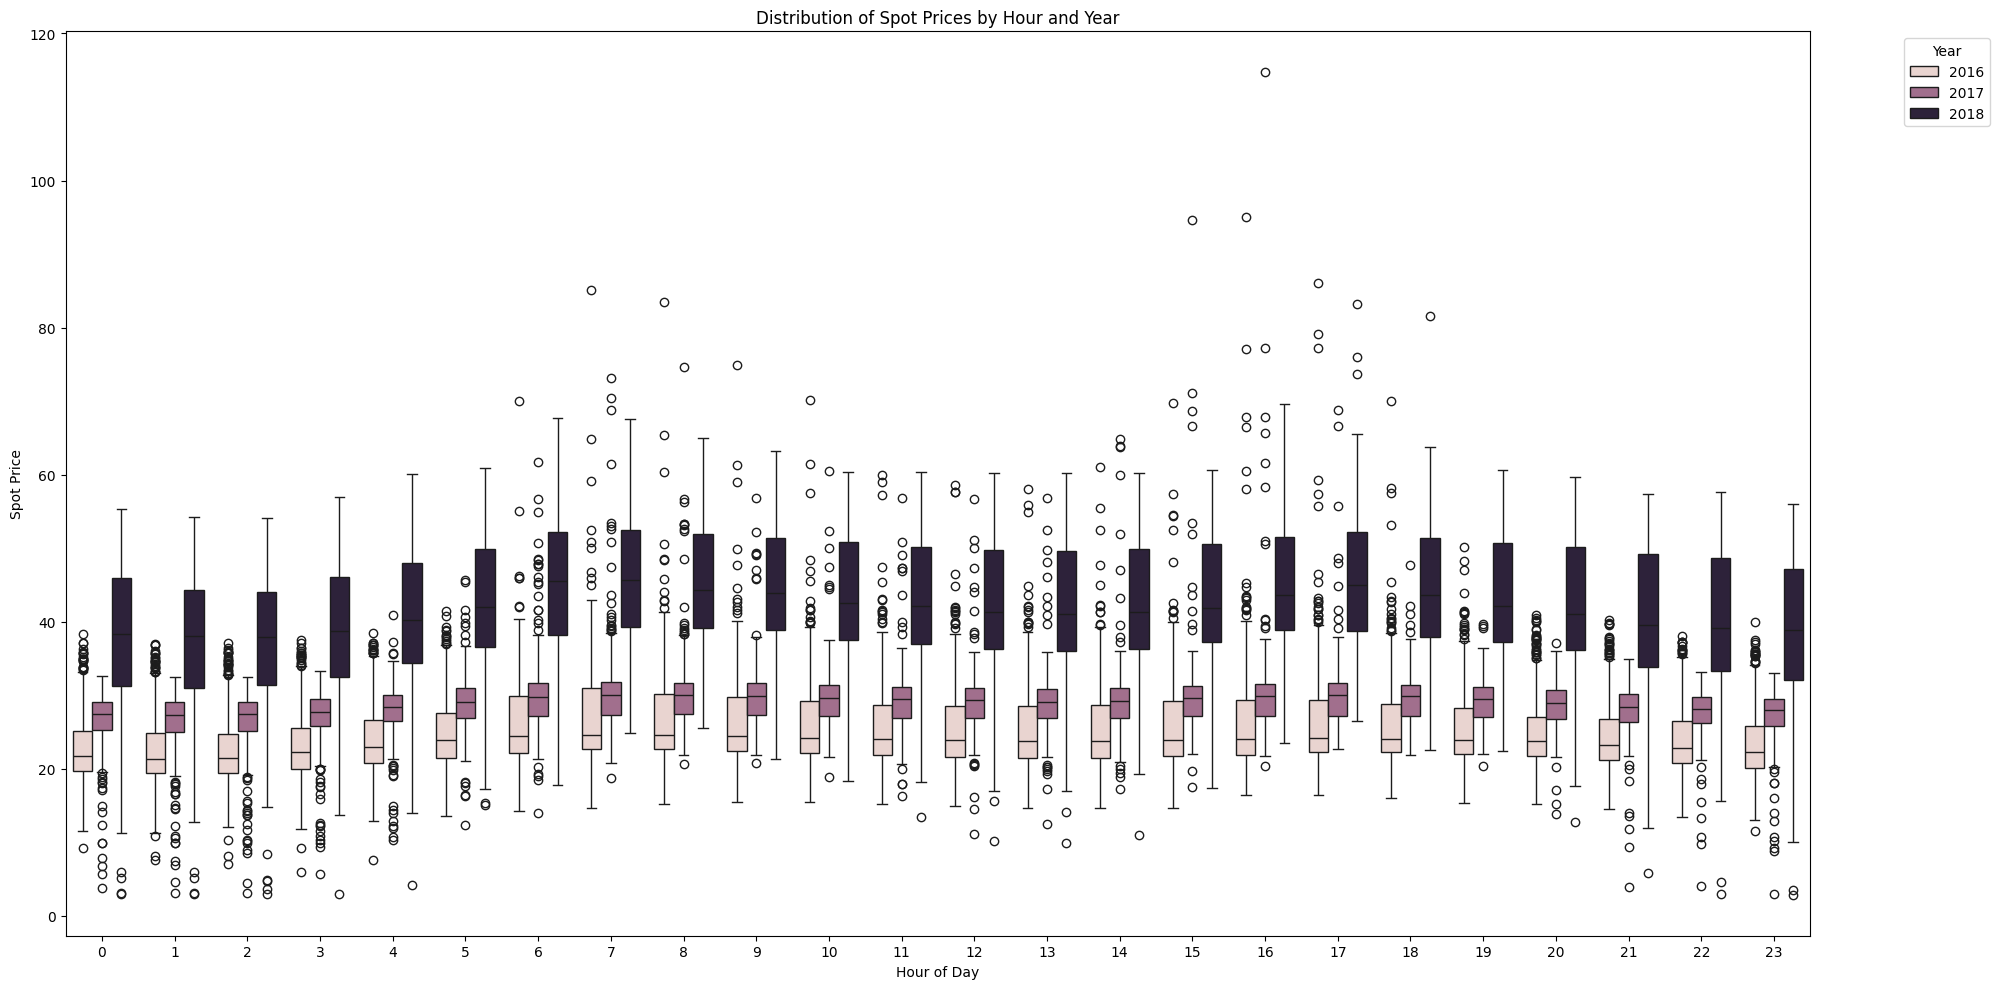

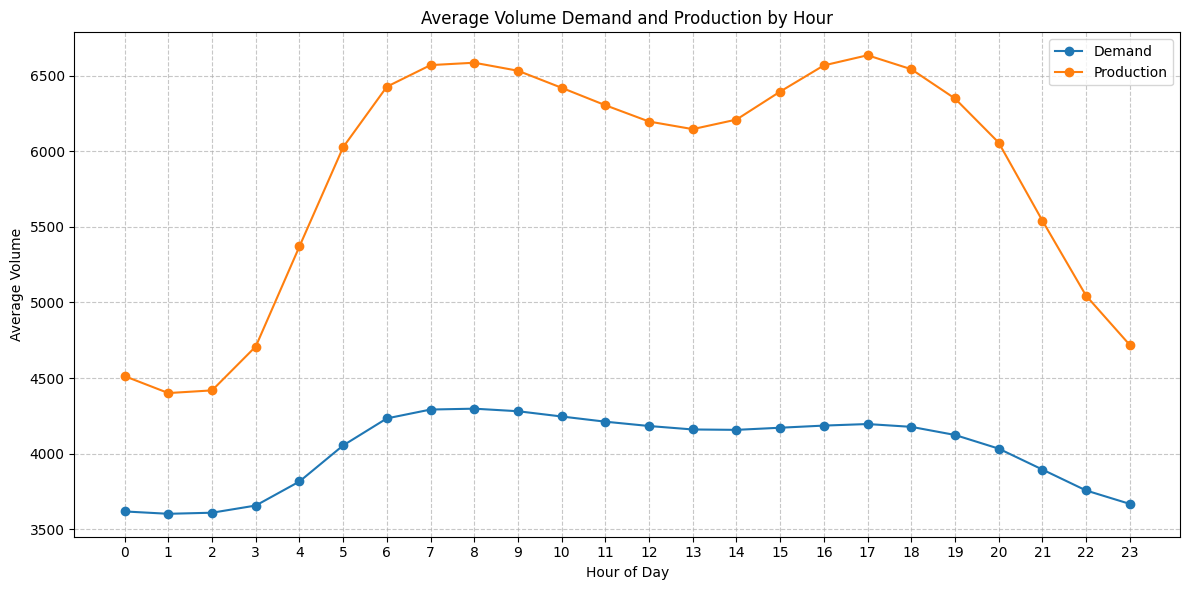

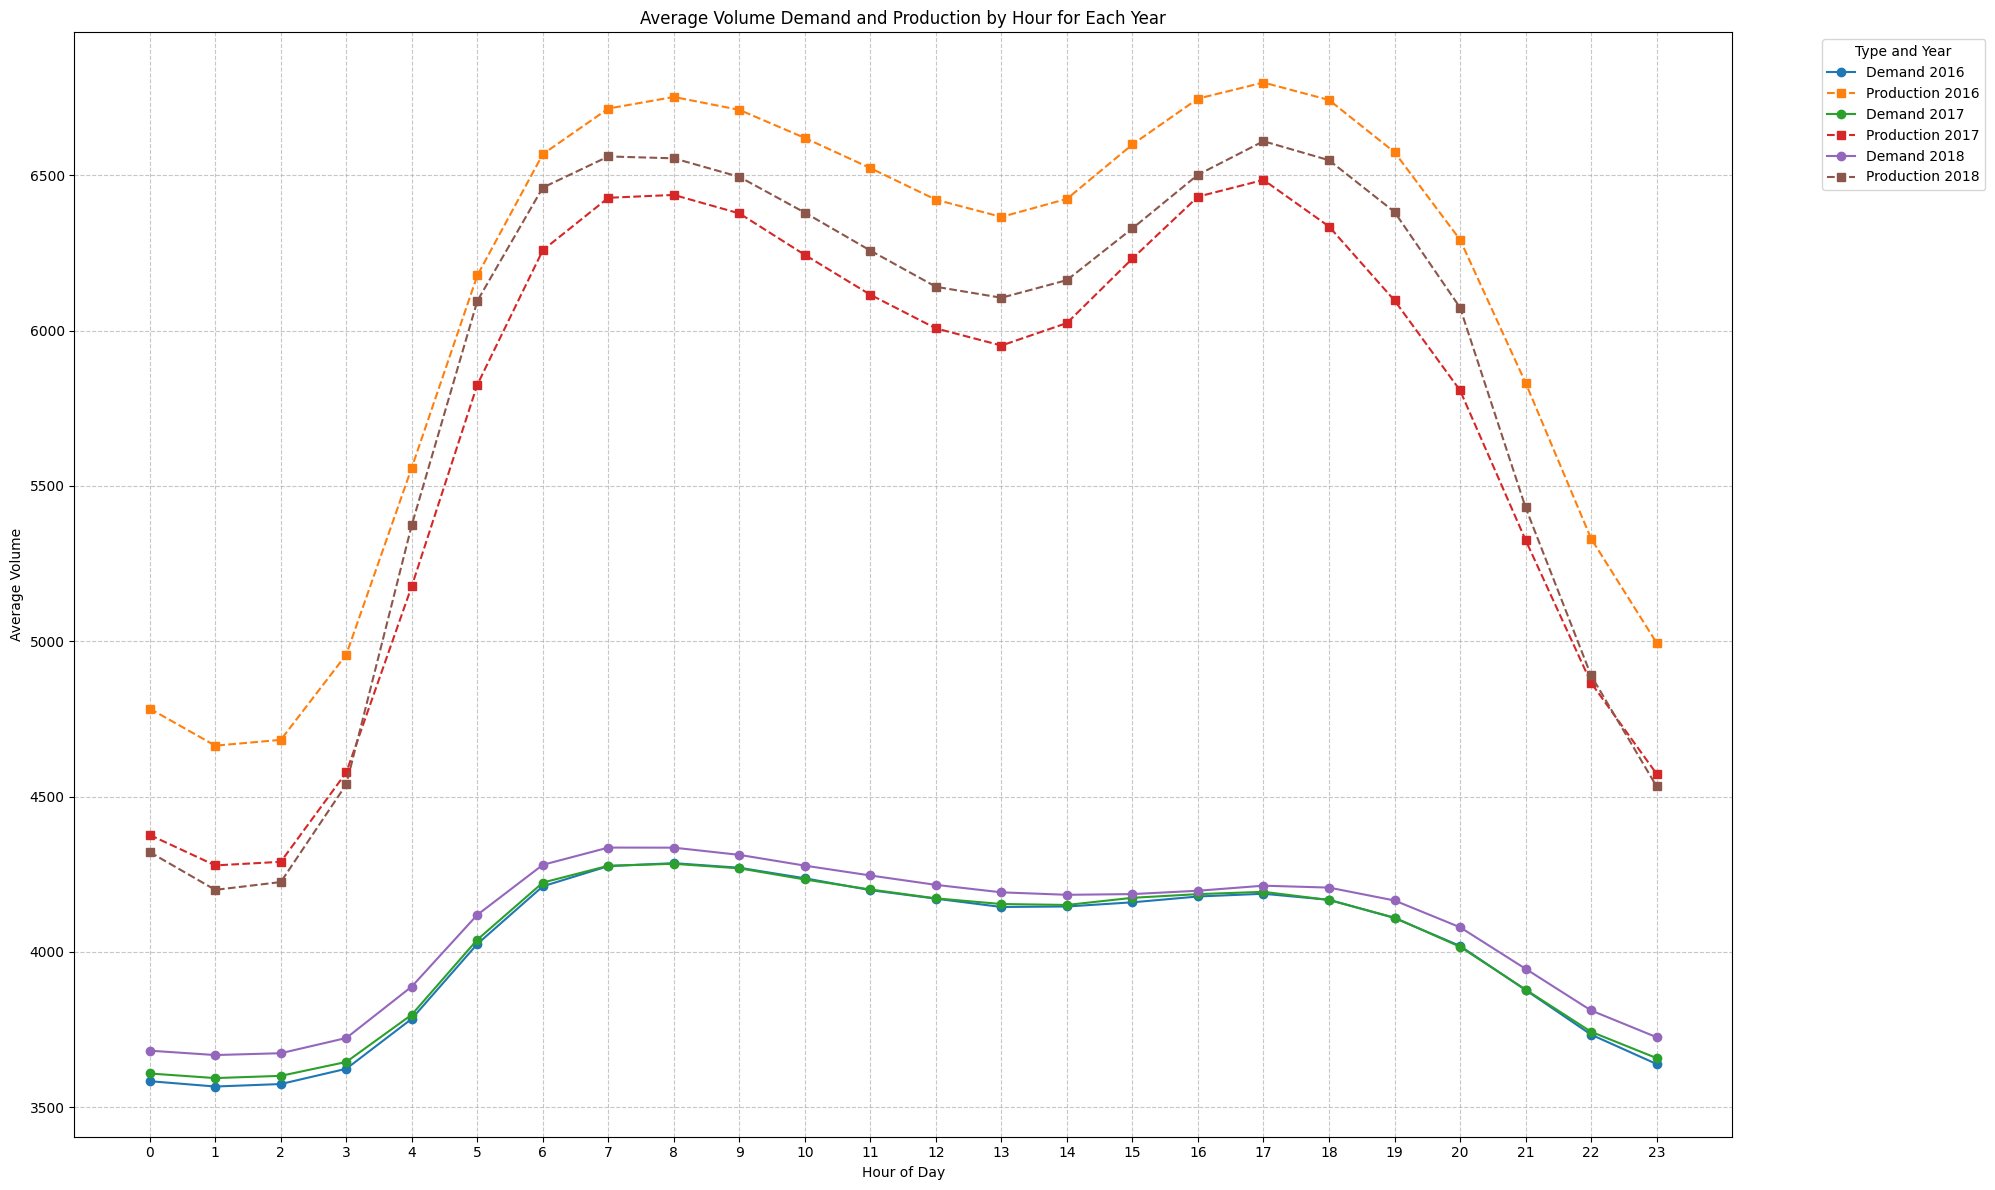

In [9]:
# New cell for intraday price analysis

# Extract hour from datetime
df['hour'] = df['datetime_utc'].dt.hour

# Calculate average spot price by hour for each year
hourly_avg = df.groupby(['year', 'hour'])['spot_price'].mean().unstack()

# Plot average spot price by hour for each year
plt.figure(figsize=(15, 8))
for year in hourly_avg.index:
    plt.plot(hourly_avg.columns, hourly_avg.loc[year], label=str(year), marker='o')

plt.title('Average Spot Price by Hour for Each Year')
plt.xlabel('Hour of Day')
plt.ylabel('Average Spot Price')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24))
plt.ylim(bottom=0)  # Ensure y-axis starts at 0
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Heatmap of average spot prices by hour and year
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_avg.T, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Spot Prices by Hour and Year')
plt.xlabel('Hour of Day')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# Box plot of spot prices by hour (all years combined)
plt.figure(figsize=(15, 8))
sns.boxplot(x='hour', y='spot_price', data=df)
plt.title('Distribution of Spot Prices by Hour (All Years)')
plt.xlabel('Hour of Day')
plt.ylabel('Spot Price')
plt.tight_layout()
plt.show()

# New plot: Box plot of spot prices by hour for each year
plt.figure(figsize=(20, 10))
sns.boxplot(x='hour', y='spot_price', hue='year', data=df)
plt.title('Distribution of Spot Prices by Hour and Year')
plt.xlabel('Hour of Day')
plt.ylabel('Spot Price')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate and plot average volume demand and production by hour
hourly_demand = df.groupby('hour')['volume_demand'].mean()
hourly_production = df.groupby('hour')['volume_production'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_demand.index, hourly_demand, label='Demand', marker='o')
plt.plot(hourly_production.index, hourly_production, label='Production', marker='o')
plt.title('Average Volume Demand and Production by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Volume')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate average volume demand and production by hour for each year
hourly_demand = df.groupby(['year', 'hour'])['volume_demand'].mean().unstack()
hourly_production = df.groupby(['year', 'hour'])['volume_production'].mean().unstack()

# Plot average volume demand and production by hour for each year
plt.figure(figsize=(20, 12))

for year in hourly_demand.index:
    plt.plot(hourly_demand.columns, hourly_demand.loc[year], 
             label=f'Demand {year}', marker='o', linestyle='-')
    plt.plot(hourly_production.columns, hourly_production.loc[year], 
             label=f'Production {year}', marker='s', linestyle='--')

plt.title('Average Volume Demand and Production by Hour for Each Year')
plt.xlabel('Hour of Day')
plt.ylabel('Average Volume')
plt.legend(title='Type and Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()